<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2025/blob/main/Lections/L02_kNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения

## Лекция 2

### Основные понятия машинного обучения. Обучение модели. Задача классификации. Метод k ближайших соседей.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

<img src="https://data.bioml.ru/htdocs/courses/bioml/neural_networks/autoencoders/unsupervised2.png" alt="Domains_tree" width= "700px;"/>

Сегодня мы с вами поговорим про задачу **классификации**.

Имея множество объектов, хотим для каждого из них уметь предсказывать метку -- так называемый *класс объекта* -- из некоторого конечного и известного заранее множества меток.

Если говорить более формально, то, определив множество признаковых описаний объектов $X$, и зная множество допустимых значений целевой переменной $Y$, ищем алгоритм, с допустимой точностью приближающий отображение $y*: X→Y$ для любого произвольного объекта $x \in X$.

![classification.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/basic_concepts/classification.png)


Но из ниоткуда такой алгоритм, конечно же, не возьмется. Более того, на реальных задачах у нас скорее всего не получится выразить отображение $y*: X→Y$ строгой математической формулой. А это означает, что для решения задачи нашу модель придется **обучать** на известных примерах: конечном множестве пар $\{(x_{1},y_{1}),\dots ,(x_{m},y_{m})\}$, называемом *обучающей выборкой*.

## Обучение модели

**Как вы думаете, что значит фраза "обучить модель"?**

![ml1_stonks.jpg](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/basic_concepts/ml1_stonks.jpg)

**Обучение** для модели - это итеративное улучшение описания данных моделью с помощью изменения ее параметров.

Например, для простой линейной модели, проводящей прямую через точки, обучение будет выглядеть как-то так:

![training_gif.gif](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/basic_concepts/training_gif.gif)

Сколько здесь параметров и как эти параметры меняются?

Фактически при обучении происходит **"подгон" параметров** вашей модели таким образом, чтобы данные **как можно лучше были описаны** этой моделью. Подгоном это можно назвать потому, что мы формулируем гипотезу после того, как видим данные, а не заранее.

*Получается, машинное обучение - это профессиональный уровень подгона моделей?*

Это не совсем так. Давайте рассмотрим эту проблему на примере самой простой модели.

## Самая простая модель классификации

**Как вы думаете, как устроена самая простая модель для задачи классификации?**

Представим, что в исходных данных у нас есть несколько размеченных образцов (будем дальше называть их **точками**). Будем считать признаки точки ее координатами в пространстве.

Тогда самый простой* способ предсказывать класс точки - это **искать ближайшую точку и выдавать ее класс в качестве предсказания**.

Немного более общий способ называется **k-NN** (метод k ближайших соседей, k nearest neighbours).

В этом случае находится **k ближайших известных точек** к той, которую мы хотим классифицировать, и предсказывается **тот класс, которого больше** среди "соседей".

Можно заметить, что в зависимости от выбранного значения **k** ответ модели для каждой конкретной точки может отличаться..

![knn_ex.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/knn_ex.png)

В замечательном пакете sklearn классификатор kNN уже реализован для нас и доступен доступен в виде класса <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn.neighbors.KNeighborsClassifier</a>



![sklearn_knn](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/sklearn_knn.png)

### Попробуем обучить классификатор k-NN

In [ ]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
# print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
knn.predict(X)[:30]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

Последние два вектора похожи, но хочется это как-то **измерить количественно**. Каким образом можно это сделать?

Для этого существует множество различных метрик качества. Мы вернемся к этому позднее.

In [ ]:
# (knn.predict(X)[:30] == y[:30]).mean()

0.8666666666666667

In [ ]:
# (knn.predict(X) == y).mean()

0.9472759226713533

### Как k-NN делает предсказание?

Воспользуемся удобными средствами, предоставляемыми sklearn, и попробуем визуализировать, как будет выглядеть принцип принятия решения классификатором k-NN на для случая двух признаков.

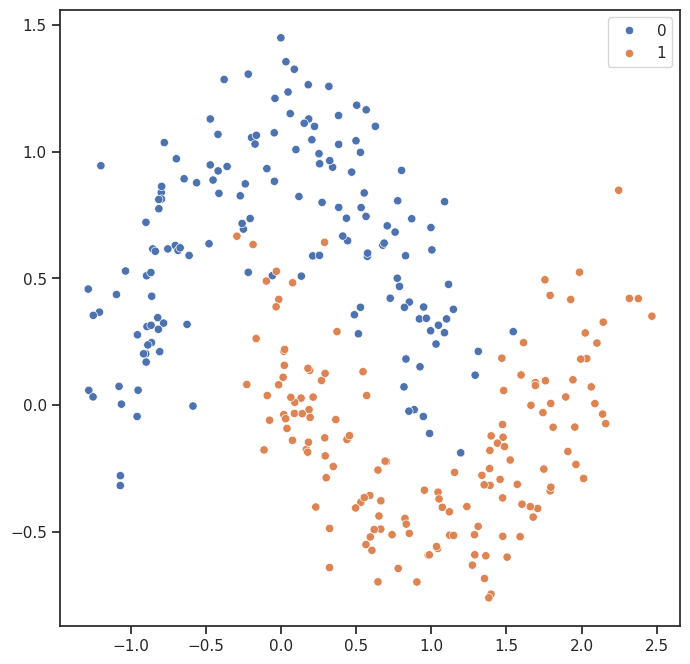

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons

n_samples = 300
f, ax = plt.subplots(1, 1, figsize=(8, 8))

points1, labels1 = make_moons(noise=0.2, random_state=371, n_samples=n_samples)
sns.scatterplot(x=points1[:, 0], y=points1[:, 1], hue=labels1, ax=ax);

In [ ]:
n_nei = 5
points, labels = points1, labels1

classifier = KNeighborsClassifier(n_neighbors=n_nei)
classifier.fit(points, labels)

KNeighborsClassifier()

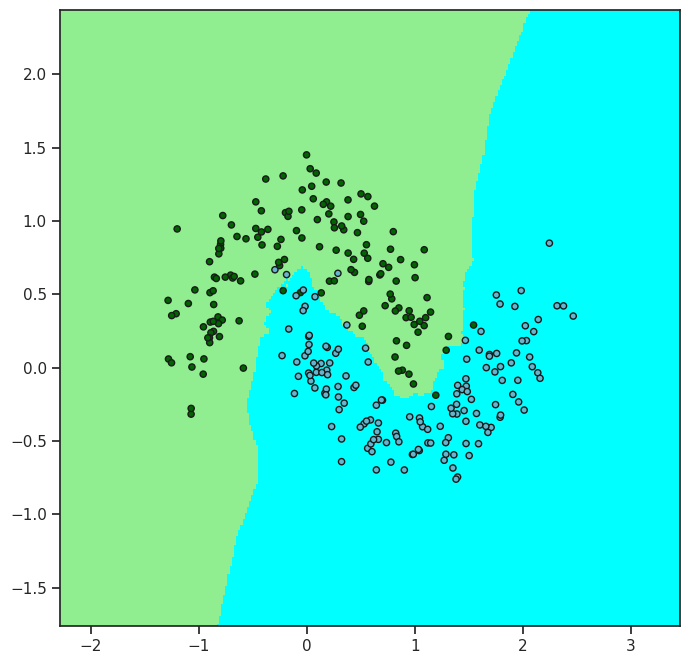

In [ ]:
h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

f, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Любая точка, попавшая в зеленую область, будет классифицирована как "зеленый" класс, а в синюю - как "синий". Можно заметить, что некоторые из точек попали в "чужую" область -- никто не обещал, что классификатор будет работать идеально. Как вы думаете, от чего это зависит?

### Плюсы и минусы k-NN

**Плюсы**:
* Простота реализации
* Дает хорошую интуицию о поведении почти всех моделей машинного обучения
* Можно сравнивать с другими моделями ML. Наши модели должны работать лучше k-NN, т.к. в нем мы ничего не оптимизируем.

**Минусы**:
* Длительное время предсказания (особенно для больших выборок)
* Трудность в интерпретации предсказания
* Необходима предобработка признаков

### Предобработка признаков

**Иногда признаки не сравнимы между собой** или вообще измеряются в разных величинах. Масштаб признаков непосредственно влияет на определение расстояния между объектами.

Проблема, например, если один признак измеряется в см, а другой в м (или вообще другой единице измерения).

В Sklearn есть отдельный класс для стандартизации признаков в вашем датасете: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">sklearn.preprocessing.StandardScaler</a>.

Он "запоминает" среднее и стандартное отклонение для каждого признака в вашем датасете (метод **fit**), после чего сможет стандартизировать с их помощью любую выборку такой размерности (метод **transform**).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer(as_frame=True)
X = breast_cancer.data
y = breast_cancer.target

selection = X[["mean symmetry", "mean area"]].values

In [ ]:
# create scaler object
scaler = StandardScaler()
# fit data to scaler
scaler.fit(selection)
# return transformed result
scaled_selection = scaler.transform(selection)

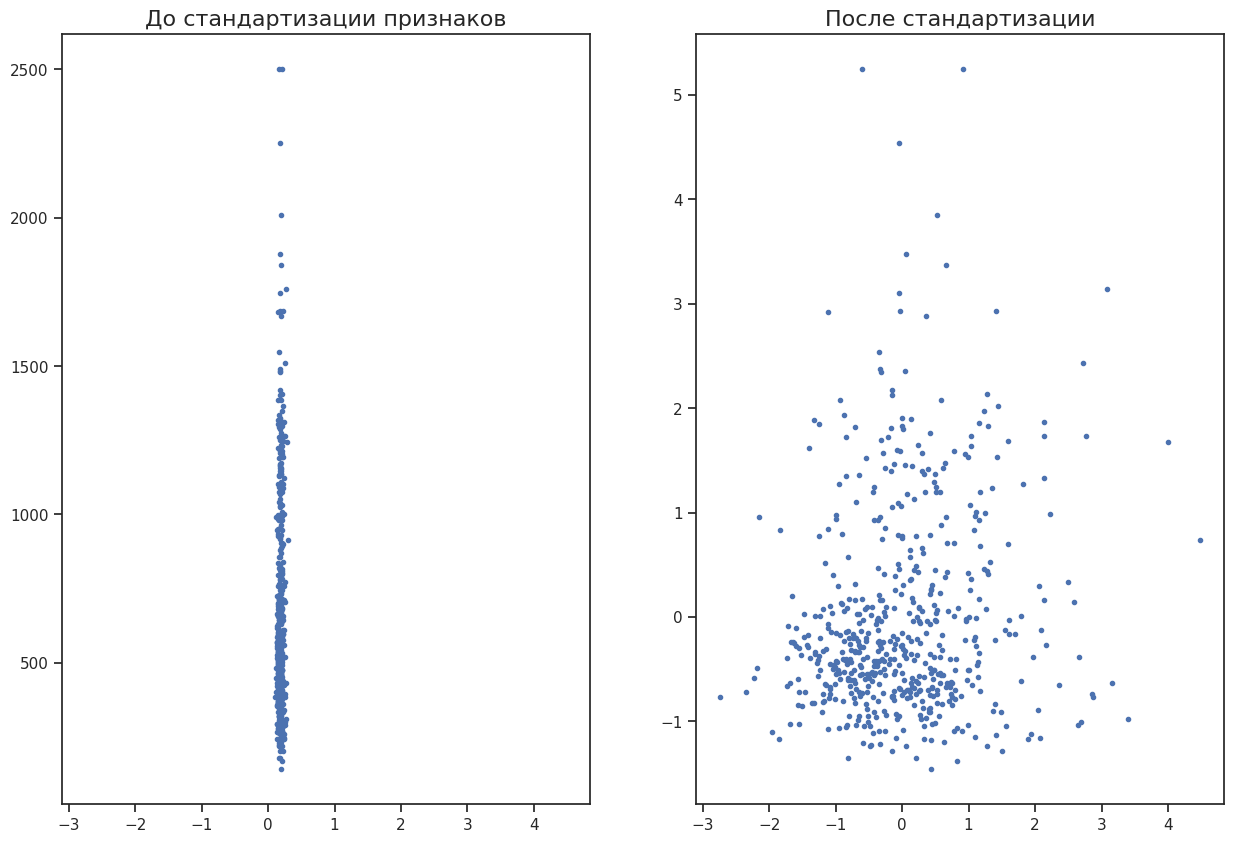

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,10))

axes[0].plot(selection[:,0], selection[:,1], 'b.')
axes[1].plot(scaled_selection[:,0], scaled_selection[:,1], 'b.')
# set same x limits on left and right plots
axes[0].set_xlim(axes[1].get_xlim())
axes[0].set_title("До стандартизации признаков", size=16)
axes[1].set_title("После стандартизации", size=16);

### Сложность модели k-NN

**Что такое "сложность" модели?**

Этот вопрос выглядит очень простым, но ответ на него довольно непрост.

В общем смысле, под "сложностью" в этом курсе мы будем понимать вовсе не то, насколько сложный алгоритм лежит в основе модели, а то, **насколько большое количество информации о закономерностях в данных способна выявить модель в процессе обучения**.

Количество информации, хранящейся в обученной модели, можно считать соразмерным тому, насколько точно мы можем восстановить информацию об использованных для обучения данных.

Очень близкое понятие - это "емкость" модели (model capacity). Обычно они взаимоменяемы.

**Как вы думаете, всегда ли верно утверждение "чем сложнее модель $-$ тем она лучше?"**

**Имея в виду такое определение "сложности", какие модели k-NN являются более сложными?**

Модель сложнее при высоких k или при низких?

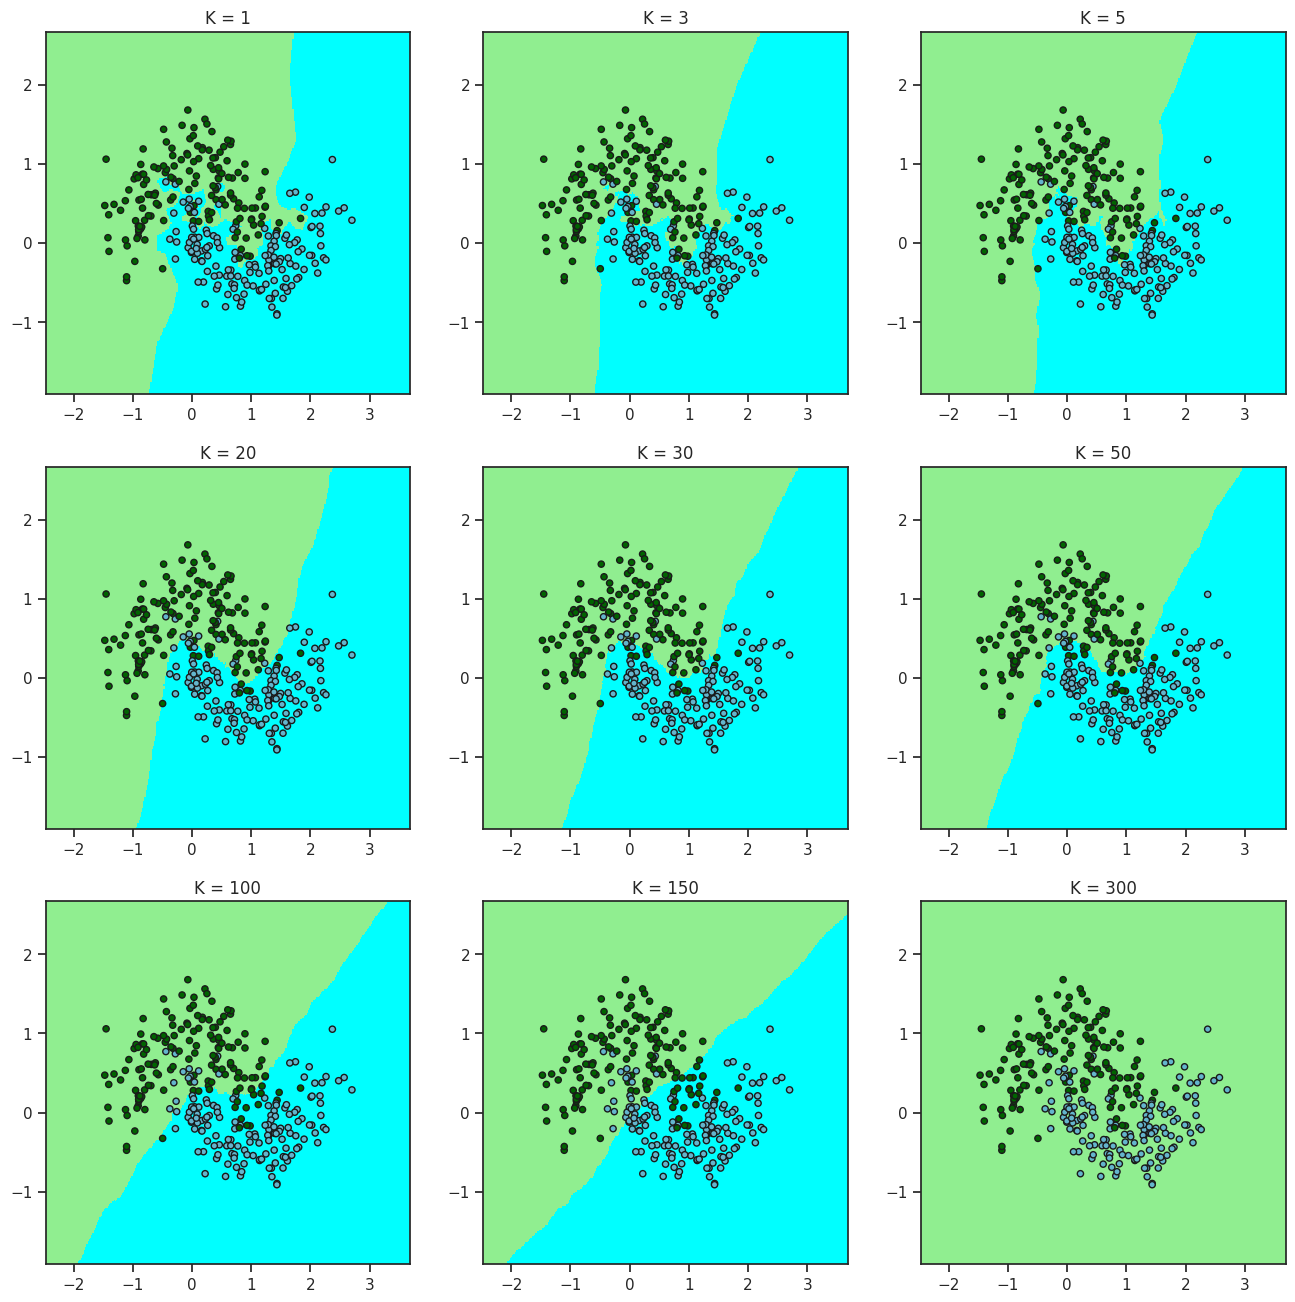

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(16, 16))
n_samples = 300
points, labels = make_moons(noise=0.3, random_state=371, n_samples=n_samples)

for n_nei, ax in zip((1, 3, 5, 20, 30, 50, 100, 150, 300), axes.flat):
    classifier = KNeighborsClassifier(n_neighbors=n_nei)
    classifier.fit(points, labels)

    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"K = {n_nei}")

Как мы видим, границы между классами по версии модели с низкими k оказываются **очень рваными** и не всегда соответствующими действительности.

В то же время, при очень высоких k мы наблюдаем **чрезмерно простую границу**.

**Какой будет результат, если взять число соседей, равное размеру выборки?**

**Какой вывод мы можем сделать?**

* Слишком простая модель не способна описать данные хорошо. Она выявляет только **очень базовые закономерности**.
* Слишком сложная модель начинает описывать **шум, который присутствует в данных**.
* Для адекватного предсказания нужно брать модель **и не слишком сложную, и не слишком простую**.

![model_complexity.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/basic_concepts/model_complexity.png)

## Недообучение и переобучение

Как мы заметили, при усложнении модели ее **описание входных данных становится более и более точным, в какой-то момент становясь неадекватно точным**. Так происходит не только с моделью k-NN. Давайте рассмотрим пример аппрокисмации полиномом (полиномиальная регрессия):

![overfitting.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/basic_concepts/overfitting.png)

Как мы видим, при степени k = 1 модель недостаточно сложна, чтобы уловить зависимости в данных, а при степени k = 17 модель описывает все: и шум, и данные, и поэтому хуже описывает исходную функцию.

Эти явления называют **недообучением** и **переобучением** модели.

**Недообучение модели** возникает, когда модели не хватает сложности для того, чтобы выучить взаимосвязь, лежащую в основе данных.

**Переобучение модели** возникает, когда модель хорошо описывает не только сами данные, но и шум в этих данных.

Предположим, что мы можем количественно измерять качество предсказаний модели k-NN. Давайте оценим, насколько хорошо полученная модель опишет те же данные, которые использовались для ее обучения.

**Как вы думаете, для какого k качество было бы наилучшим?**

Для k = 1. Это так, потому что при предсказании используется **точка, наиболее близкая к определяемой**, то есть **она сама**. Очевидно, предсказываемый класс будет всегда совпадать.

![knn_k1.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/knn_k1.png)

![knn_quality.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/knn_quality.png)

Это как раз тот случай "идеального подгона" - мы подогнали нашу модель так, что она идеально описывает входные данные. Но задача машинного обучения вовсе не в этом...

...ведь тогда непобедимым бейзлайном является обычный словарь :^)

### Задача обучения с учителем

Задача машинного обучения - создать такую модель, которая будет **хорошо описывать новые данные**, которые модель не "видела".

**Как вы думаете, каким способом нужно оценивать качество модели?**

Классический способ: **до обучения модели выборка разбивается на 2 части**: одна из них называется **тренировочной** (train), а другая - **тестовой** (test).

**В какой пропорции разбивают на train/test?**

На самом деле, это достаточно творческий вопрос, и ответ на него в первую очередь **зависит от объема и природы ваших данных**. Иногда для теста достаточно 1% информации, а иногда нужно положить туда добрую половину.

Обычно берут **70-80% для обучения** и **20-30% для теста** модели, но это не жесткое правило.

![train-test.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/basic_concepts/train-test.png)

#### Зависимость качества от сложности модели

Если оценим качество модели k-NN в зависимости от числа соседей k на train и test, то получим такую картину:

![knn_quality_test.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/knn_quality_test.png)

По оси X отложены k в порядке убывания, то есть сложность модели растет вдоль X.

Как мы видим, при k $\approx$ 30 качество на test перестает расти с увеличением сложности модели. При дальнейшем увеличении сложности качество на test падает.

Наибольшее качество достигается в районе k~33 - 27. Из этого лучше брать наиболее простую модель (т.е. при k=33).

Когда с увеличением сложности модели вы наблюдаете **увеличение качества модели на train** и **уменьшение качества на test**, происходит переобучение.

![knn_quality_test.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/knn_quality_test.png)

#### Зависимость качества от соотношения train/test

Качество также зависит от соотношения train/test.

![train-test-split.png](https://data.bioml.ru/htdocs/courses/bioml/classic_ml/supervised/knn/train-test-split.png)

Для того чтобы посмотреть, как это все работает, нужно познакомиться с разными **метриками качества**.

## Оценка качества модели в задаче классификации

Хорошо бы иметь возможность количественно **оценить, насколько хорошо обученная модель описывает данные**. Для этого используют несколько разных метрик качества.

Для разных задач обучения с учителем (supervised) используются различные метрики. Мы разберем, какие метрики используются для задачи классификации и задачи регрессии.

Для каждой метрики мы попытаемся сформулировать т.н. **baseline** - качество, которое достигается либо случайным предсказателем, либо очень простой моделью.

Перед тем, как пытаться оценить качество модели классификации, мы:
1. Составим тренировочную и тестовую выборки.
2. Обучим модель на тренировочной выборке.
3. Получим вектор предсказаний модели для тестовой выборки.

**Разбиение на train/test**

sklearn предоставляет удобную функцию для разбиения ваших данных:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=777)

In [ ]:
print(f"Train size = {y_train.shape}")
print(f"Test size = {y_test.shape}")

Train size = (398,)
Test size = (171,)


**Обучение модели на train**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

**Получение предсказаний для test**

In [ ]:
y_test_pred = knn.predict(X_test)

**Получение предсказаний для train**

(в педагогических целях)

In [ ]:
y_train_pred = knn.predict(X_train)

### Метрика Accuracy (точность v1.0)

*Однажды Сталин беседовал с метеорологами. Он сам в юности работал наблюдателем-метеорологом в Тифлисской физической обсерватории.*

*— Какая у вас точность прогнозов? — спросил Сталин.*

*— Сорок процентов, товарищ Сталин, — сокрушённо ответили метеорологи. — Современными приборами трудно достичь большей точности.*

*— А вы говорите наоборот, — предложил Сталин, — и тогда у вас будет шестьдесят процентов!*

**Accuracy** (точность) - метрика качества, равная доле правильно классифицированных образцов.

$$accuracy = \dfrac{N_{correct}}{N}$$

In [ ]:
from sklearn.metrics import accuracy_score

Качество на train:

In [ ]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.9221105527638191

Качество на test:

In [ ]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9181286549707602

Как мы видим, **качество на train выше, чем качество на test**.

Метрика accuracy **очень простая** и ее можно посчитать **для любого числа классов** (дальше мы будем рассматривать метрики для *бинарной* классификации).

Однако в ее простоте заключается ее большой недостаток: accuracy не способна показать, в объектах какого класса мы ошибаемся чаще.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

accuracy_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.951

Классификатор предсказывает нули почти вседа. По сути он бесполезен, но его метрика accuracy высокая.

В scikit-learn есть т.н. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html">Dummy</a>-классификаторы, которыми удобно пользоваться для оценки качества бейзлайна.

Следовательно, **baseline для метрики accuracy - это наибольшая из долей классов**.

Например, если класса 3, и их доли равны 20%, 30% и 50%, то baseline = 0.5.

(Т.е. можем без всяких моделей возвращать метку наиболее представленного класса и получим точность, равную его доле)

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
clf = DummyClassifier()
clf.fit(None, dummy_y)

DummyClassifier()

In [ ]:
preds = clf.predict([None for i in range(dummy_y.shape[0])])

In [ ]:
accuracy_score(y_true=dummy_y, y_pred=preds)

0.95

**Почему так?**

Модель, которая независимо от входных данных предсказывает наибольший класс (фактически предсказывая среднее) будет иметь такое качество.

### Метрики качества бинарной классификации

При бинарной классификации обычно **выделяют "положительный"** (positive) **и "отрицательный"** (negative) **классы**.

![tp_fp_tn_fn.png](https://kodomo.fbb.msu.ru/FBB/year_20/ml/mfk/lec2/tp_fp_tn_fn.png)

*Источник: [Wikipedia Commons](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#/media/File:Sensitivity_and_specificity_1.01.svg)*

**TP, FP, TN и FN** - это количества образцов в каждой из групп.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[ 44,  13],
       [  1, 113]])

In [ ]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(estimator=knn, X=X_test, y_true=y_test)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

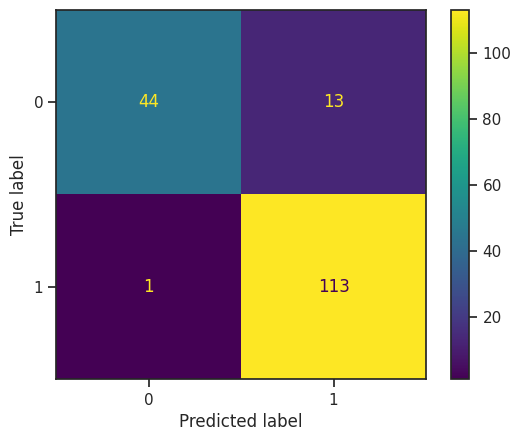

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

Сами по себе TP, FP, TN, FN говорят не очень многое, но **они могут быть использованы в комбинации**, и из них получают множество других метрик.

### Метрика precision (точность v2.0)

Да, по-русски она тоже называется "точность". Эта метрика отражает, **сколько положительных предсказаний были правильными**.

$$precision = \dfrac{TP}{TP + FP}$$

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_true=y_train, y_pred=y_train_pred)

0.9108527131782945

In [ ]:
precision_score(y_true=y_test, y_pred=y_test_pred)

0.8968253968253969

Если положительный класс предсказывается очень редко, то метрика становится неинформативна.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

precision_score(y_true=dummy_y, y_pred=dummy_y_pred)

1.0

### Метрика recall (sensitivity, чувствительность)

Эта метрика показывает, **сколько положительных образцов были определены правильно**.

$$recall = \dfrac{TP}{TP + FN}$$

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_true=y_train, y_pred=y_train_pred)

0.9670781893004116

In [ ]:
recall_score(y_true=y_test, y_pred=y_test_pred)

0.9912280701754386

Если положительный класс предсказывается очень редко, то метрика это хорошо иллюстрирует.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

recall_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.02

...зато наоборот - плохо.

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

recall_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.98

### Метрика specificity (специфичность)

Эта метрика показывает, **сколько отрицательных образцов были определены правильно**.

$$specificity = \dfrac{TN}{TN + FP}$$

Фактически это **recall для негативного класса**.

In [ ]:
from sklearn.metrics import specificity_score

ImportError: cannot import name 'specificity_score' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

В scikit-learn нет функции для расчета этой метрики.

Как мы видим, перечисленные метрики (precision, recall, specificity) пользуются только частью матрицы ошибок. Следующие метрики пытаются исправить этот недостаток.

### F1-score

Метрика F1 - это **среднее гармоническое precision и recall**.

$$F1 = \dfrac{2}{\dfrac{1}{recall} + \dfrac{1}{precision}}$$

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_true=y_train, y_pred=y_train_pred)

0.93812375249501

In [ ]:
f1_score(y_true=y_test, y_pred=y_test_pred)

0.9416666666666667

В обоих вырожденных случаях предсказания F1 ловит проблему (дает низкое качество).

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.zeros(1000)
dummy_y_pred[0] = 1

f1_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.0392156862745098

In [ ]:
import numpy as np

dummy_y = np.zeros(1000)
dummy_y[:50] = 1
dummy_y_pred = np.ones(1000)  # now all predictions are = 1
dummy_y_pred[0] = 0

f1_score(y_true=dummy_y, y_pred=dummy_y_pred)

0.09342230695900858

### Classification report

В sklearn есть замечательная возможность посмотреть быструю сводку различных метрик.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       155
           1       0.91      0.97      0.94       243

    accuracy                           0.92       398
   macro avg       0.93      0.91      0.92       398
weighted avg       0.92      0.92      0.92       398



In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86        57
           1       0.90      0.99      0.94       114

    accuracy                           0.92       171
   macro avg       0.94      0.88      0.90       171
weighted avg       0.92      0.92      0.92       171

